In [3]:
import numpy as np # linear algebra
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,load_img

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import pandas as pd 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data=pd.read_csv("/content/drive/MyDrive/fer2013.csv/fer2013.csv")

In [8]:
labels=data.iloc[:,[0]].values
pixels=data['pixels']
#Facial Expressions
Expressions={0:"Angry",1:"Disgust",2:"Fear",3:"Happy",4:"Sad",5:"Surprise",6:"Neutral"}

labels = to_categorical(labels,len(Expressions))

'Disgust'

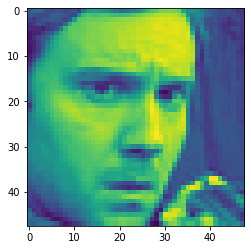

In [9]:
images = np.array([np.fromstring(pixel, dtype=int, sep=" ")for pixel in pixels])
images=images/255.0
images = images.reshape(images.shape[0],48,48,1).astype('float32')


plt.imshow(images[0][:,:,0])
Expressions[labels[0][0]]

In [10]:
#splitting data into training and test data
train_images,test_images,train_labels,test_labels = train_test_split(images,labels,test_size=0.2,random_state=0)

In [11]:
train_labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
def create_convolutional_model(classes):
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(2,2),strides=(1,1),activation='relu',input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=128,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=256,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(classes,activation='softmax'))
    
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model 

In [13]:
classes=7
model = create_convolutional_model(classes)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 47, 47, 32)        160       
                                                                 
 batch_normalization (BatchN  (None, 47, 47, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        8256      
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 64)       2

In [14]:
model.fit(train_images,train_labels,batch_size=105,epochs=10,verbose=1)

Epoch 1/10
274/274 [==============================] - 558s 2s/step - loss: 1.8522 - accuracy: 0.3396
Epoch 2/10
274/274 [==============================] - 555s 2s/step - loss: 1.4621 - accuracy: 0.4486
Epoch 3/10
274/274 [==============================] - 551s 2s/step - loss: 1.2917 - accuracy: 0.5102
Epoch 4/10
274/274 [==============================] - 551s 2s/step - loss: 1.1960 - accuracy: 0.5462
Epoch 5/10
274/274 [==============================] - 553s 2s/step - loss: 1.1180 - accuracy: 0.5772
Epoch 6/10
274/274 [==============================] - 551s 2s/step - loss: 1.0484 - accuracy: 0.6043
Epoch 7/10
274/274 [==============================] - 547s 2s/step - loss: 1.0272 - accuracy: 0.6129
Epoch 8/10
274/274 [==============================] - 547s 2s/step - loss: 0.9113 - accuracy: 0.6611
Epoch 9/10
274/274 [==============================] - 546s 2s/step - loss: 0.8496 - accuracy: 0.6847
Epoch 10/10
274/274 [==============================] - 549s 2s/step - loss: 0.7555 - accura

In [15]:
label_pred=model.predict(test_images)
label_pred=np.argmax(label_pred,axis = 1)

225/225 [==============================] - 30s 132ms/step


Normalized confusion matrix
[[0.60561915 0.01040583 0.09573361 0.0603538  0.10509886 0.04474506
  0.0780437 ]
 [0.31132075 0.40566038 0.10377358 0.03773585 0.09433962 0.03773585
  0.00943396]
 [0.1749503  0.00894632 0.4304175  0.04274354 0.1500994  0.12127237
  0.07157058]
 [0.05498095 0.00217746 0.0397387  0.75939031 0.04681546 0.0397387
  0.05715841]
 [0.2038065  0.00475813 0.17287867 0.05154639 0.40761301 0.03092784
  0.12846947]
 [0.0387985  0.         0.11013767 0.04130163 0.02252816 0.76971214
  0.0175219 ]
 [0.16639073 0.00496689 0.08774834 0.07450331 0.12086093 0.06539735
  0.48013245]]


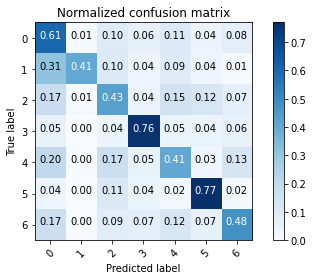

In [16]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

test_labels=np.argmax(test_labels,axis=1)
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels,label_pred)
class_names=Expressions
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()